# Modelo de Regresion Logistica

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [2]:
# Borramos las columnas irrelevantes
df.drop(['id','Unnamed: 32'],axis = 1 ,inplace=True)

In [3]:
df.diagnosis = df.diagnosis.apply(lambda x: 1 if x == 'M' else 0)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Eliminacion Recursiva de CAracteristicas (RFE)

Vamos a aplicar una reduccion y asi usar las caracteristicas mas importante. La iteracion abarcara las un limite para 30 variables y veremos cual obtuvo un mejor score y con que cantidad de variables

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# Escalar los datos
sc_x = StandardScaler().fit(x_train)
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

caracteristicas = []

for i in range(1,31):
    # Modelo de regresión logística
    model = LogisticRegression(max_iter=100)

    # Aplicar RFE 
    rfe = RFE(estimator=model, n_features_to_select=i)
    rfe.fit(x_train, y_train)

    # Ver qué características fueron seleccionadas
    selected_features = X.columns[rfe.support_]
    caracteristicas.append(selected_features)

    # Ajustar el modelo solo con las características seleccionadas
    x_train_rfe = rfe.transform(x_train)
    x_test_rfe = rfe.transform(x_test)

    # Entrenar el modelo con las características seleccionadas
    model.fit(x_train_rfe, y_train)

    # Hacer predicciones y evaluar el modelo
    y_pred = model.predict(x_test_rfe)
    print(f'Num. Caract: {i} | Score: {round(rfe.score(x_test,y_test),4)}')

Num. Caract: 1 | Score: 0.9474
Num. Caract: 2 | Score: 0.9561
Num. Caract: 3 | Score: 0.9649
Num. Caract: 4 | Score: 0.9561
Num. Caract: 5 | Score: 0.9737
Num. Caract: 6 | Score: 0.9737
Num. Caract: 7 | Score: 0.9737
Num. Caract: 8 | Score: 0.9737
Num. Caract: 9 | Score: 0.9737
Num. Caract: 10 | Score: 0.9737
Num. Caract: 11 | Score: 0.9737
Num. Caract: 12 | Score: 0.9825
Num. Caract: 13 | Score: 0.9737
Num. Caract: 14 | Score: 0.9825
Num. Caract: 15 | Score: 0.9737
Num. Caract: 16 | Score: 0.9825
Num. Caract: 17 | Score: 0.9825
Num. Caract: 18 | Score: 0.9737
Num. Caract: 19 | Score: 0.9737
Num. Caract: 20 | Score: 0.9737
Num. Caract: 21 | Score: 0.9737
Num. Caract: 22 | Score: 0.9737
Num. Caract: 23 | Score: 0.9737
Num. Caract: 24 | Score: 0.9737
Num. Caract: 25 | Score: 0.9737
Num. Caract: 26 | Score: 0.9737
Num. Caract: 27 | Score: 0.9737
Num. Caract: 28 | Score: 0.9737
Num. Caract: 29 | Score: 0.9737
Num. Caract: 30 | Score: 0.9737


Utilizaremos el modelo con 17 caracteristicas

In [5]:
X = df[caracteristicas[16]]
Y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [6]:

# Escalar los datos
sc_x = StandardScaler().fit(x_train)
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

model_red = LogisticRegression(max_iter=100)
model_red.fit(x_train, y_train)
model_red.score(x_test,y_test)

0.9824561403508771

La siguiente grafica nos mostrara el performance del modelo, aqui se mostrara la matriz de confusion, curva roc, curva precision-recall y el peso de los coeficientes que intervienen en el modelo

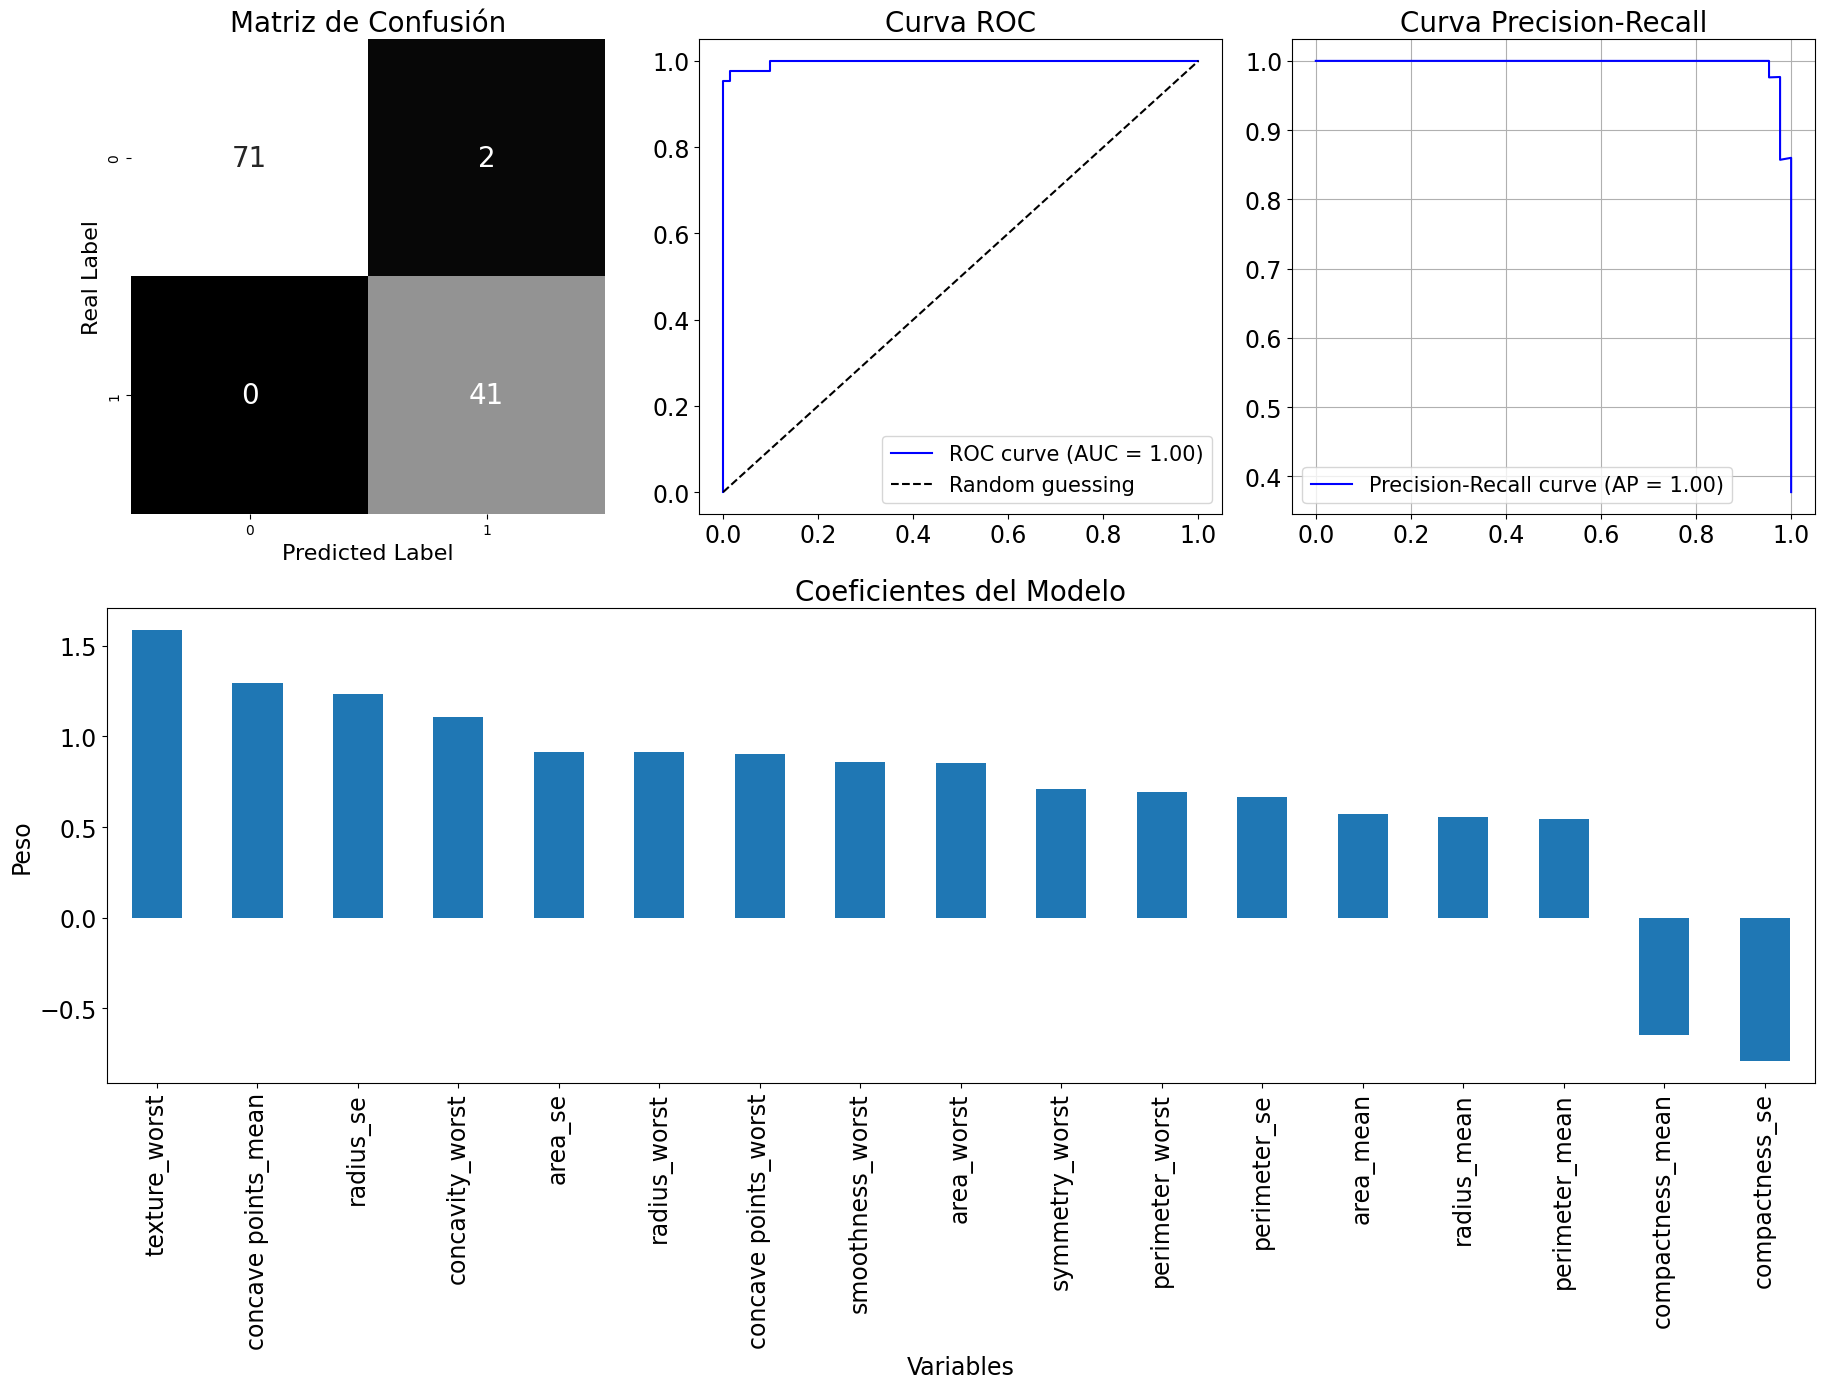

In [12]:
import metricas as mt
mt.graf(model_red,x_test,y_test, X)

Almacenamos el modelo entrenado. Recordar que para su funcionamiento se usaron las siguientes caracteristicas:

`['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean',
'concave points_mean', 'radius_se', 'perimeter_se', 'area_se',
'compactness_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
'area_worst', 'smoothness_worst', 'concavity_worst',
'concave points_worst', 'symmetry_worst']`

In [17]:
import joblib
joblib.dump(model_red,'modelo.pkl')

['modelo.pkl']